In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv('annotated_points_np_201.csv')
dataset

,x,y,labels
0,3.810484,27.451299,1
1,6.350806,27.613636,1
2,7.560484,24.610390,1
3,8.528226,20.551948,1
4,8.225806,13.814935,1
...,...,...,...
195,22.016129,21.688312,2
196,20.927419,25.178571,2
197,20.806452,21.769481,2
198,20.443548,19.415584,2


In [8]:
dataset.labels[dataset.labels==2]=-1

C:\Users\biswajit\AppData\Local\Temp\ipykernel_10332\4293624087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.labels[dataset.labels==2]=-1


In [9]:
dataset

,x,y,labels
0,3.810484,27.451299,1
1,6.350806,27.613636,1
2,7.560484,24.610390,1
3,8.528226,20.551948,1
4,8.225806,13.814935,1
...,...,...,...
195,22.016129,21.688312,-1
196,20.927419,25.178571,-1
197,20.806452,21.769481,-1
198,20.443548,19.415584,-1


In [10]:
x = np.array(dataset['x'])
y = np.array(dataset['y'])
labels = np.array(dataset['labels'])



In [11]:
x.shape

(200,)

In [12]:
test_train = np.c_[x, y]
print(len(test_train))

200


In [13]:
# y_train

In [14]:
# x_train.shape[1]

In [15]:
# w = np.zeros(x_train.shape[1])
# w

In [16]:
# max_iter=1000

In [37]:
def perceptron_train(x, y, labels, max_iter=400):
    x_train = np.c_[x, y]
    
    # Initialize weights
    w = np.zeros(x_train.shape[1])
    bias=0
    
    for t in range(max_iter):
        misclassified = False
        
        for i in range(len(x_train)):
            if labels[i] * (np.dot(w, x_train[i])+bias) <= 0:
                w = w + (0.5)*(labels[i] * x_train[i])
                bias=bias+(0.5)*labels[i]
                misclassified = True
                # print(w)
        
        if not misclassified:
            return w, bias
    
    return w, bias

    

Extra

In [38]:
x_train = np.array(dataset['x'])
y_train = np.array(dataset['y'])
labels = np.array(dataset['labels'])


weights, bias = perceptron_train(x_train, y_train, labels)
print("Learned weights:", weights)
print("Learned bias:", bias)

Learned weights: [-137346.77419355 -322662.33766234]
Learned bias: -20000.0


Extra

In [39]:
def plot_separation_line(x, y, labels, weights, bias):
    plt.scatter(x, y, c=labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    
    # Plot the separation line
    x_values = np.linspace(min(x), max(x), 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    
    plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Learning Algorithm')
    plt.show()


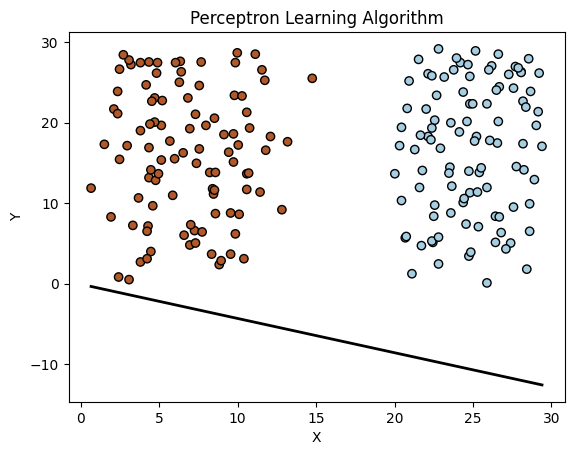

In [40]:
plot_separation_line(x_train, y_train, labels, weights, bias)